In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
data = np.load("data.npy")
mfps = np.load("mfps.npy")
lengths = np.load("lengths.npy")
network_lengths = 10e-6 * np.array([i for i in range(1, 50 + 1)])

Text(0, 0.5, 'Ensemble mean transmission')

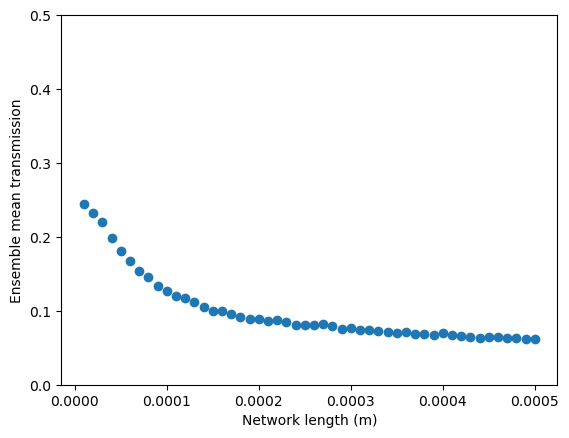

In [3]:
# Ensemble mean transmission vs thickness
means = [np.mean(row) for row in data]
fig, ax = plt.subplots()
ax.scatter(network_lengths, means)
ax.set_ylim(0.0,0.5)
ax.set_xlabel("Network length (m)")
ax.set_ylabel("Ensemble mean transmission")

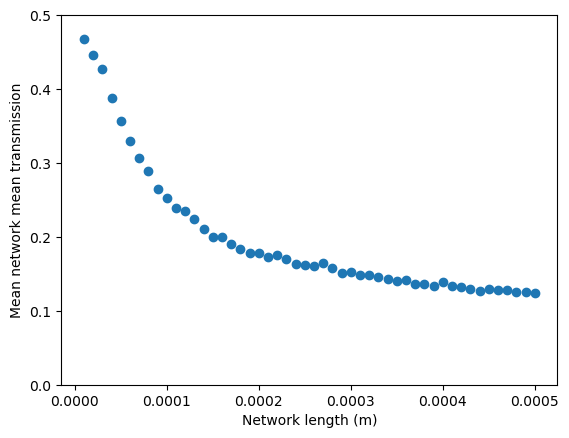

In [4]:
# Network mean transmission vs thickness
fig, ax = plt.subplots()
ax.set_ylim(0.0,0.5)
ax.set_xlabel("Network length (m)")
ax.set_ylabel("Mean network mean transmission")

for i, row in enumerate(data):
    group_means = []
    for j in range(0,len(row), 10):
        group_mean = np.mean(row[j:j+5])
        group_means.append(group_mean)
    new_mean = np.mean(group_means)

    ax.scatter(network_lengths[i], new_mean, color="tab:blue")

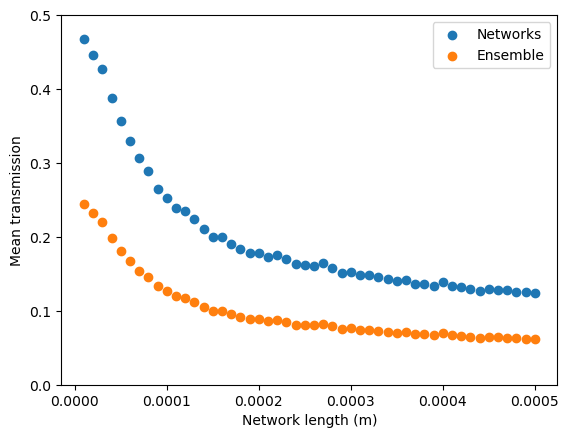

In [5]:
# Ensemble mean transmission vs thickness

fig, ax = plt.subplots()
ax.set_ylim(0.0,0.5)
ax.set_xlabel("Network length (m)")
ax.set_ylabel("Mean transmission")

for i, row in enumerate(data):
    group_means = []
    for j in range(0,len(row), 10):
        group_mean = np.mean(row[j:j+5])
        group_means.append(group_mean)
    new_mean = np.mean(group_means)

    if i == 0:
        ax.scatter(network_lengths[i], new_mean, color="tab:blue", label="Networks")
    else:
        ax.scatter(network_lengths[i], new_mean, color="tab:blue")
    

means = [np.mean(row) for row in data]
ax.scatter(network_lengths, means, color="tab:orange", label="Ensemble")
ax.legend(loc="upper right")

Text(0, 0.5, 'Ensemble max transmission')

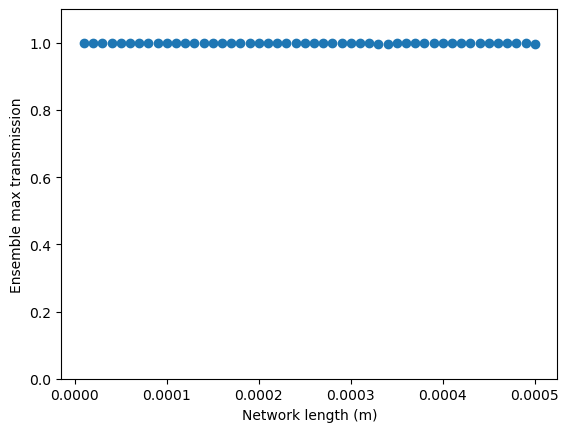

In [6]:
# Ensemble max transmission
# That is, the largest transmission over the ensemble of all networks
maxes = [np.max(row) for row in data]
fig, ax = plt.subplots()
ax.scatter(network_lengths, maxes)
ax.set_ylim(0.0,1.1)
ax.set_xlabel("Network length (m)")
ax.set_ylabel("Ensemble max transmission")

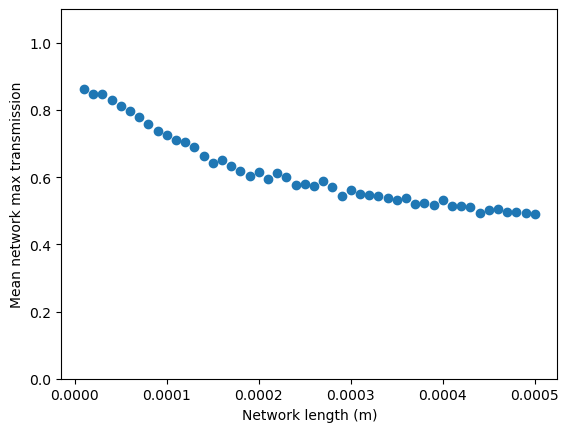

In [7]:
# Network max transmission vs thickness
fig, ax = plt.subplots()
ax.set_ylim(0.0,1.1)
ax.set_xlabel("Network length (m)")
ax.set_ylabel("Mean network max transmission")

for i, row in enumerate(data):
    group_maxes = []
    for j in range(0,len(row), 10):
        group_max = np.max(row[j:j+5])
        group_maxes.append(group_max)
    new_mean = np.mean(group_maxes)
    ax.scatter(network_lengths[i], new_mean, color="tab:blue")

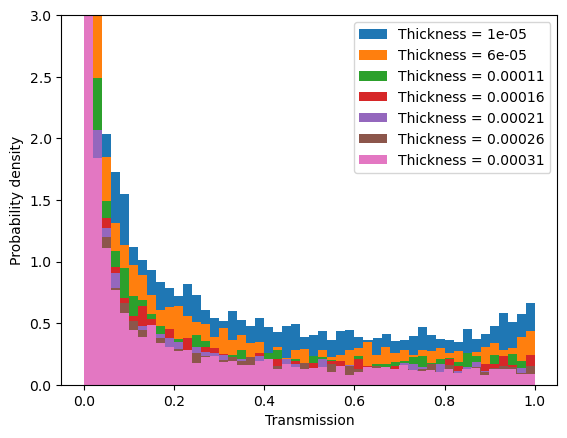

In [8]:
# PDFs at different thicknesses
# Smallest thickness
n_bins = 50
fig, ax = plt.subplots()
for i in range(0,30+5,5):
    row = data[i]
    ax.hist(row, bins=n_bins, density=True, label=f"Thickness = {network_lengths[i]:.2}")

ax.set_xlabel("Transmission")
ax.set_ylabel("Probability density")
ax.set_ylim(0,3)
ax.legend()